# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [50]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
student_data = pd.DataFrame({
    "Age": [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    "Tardies": [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

In [4]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

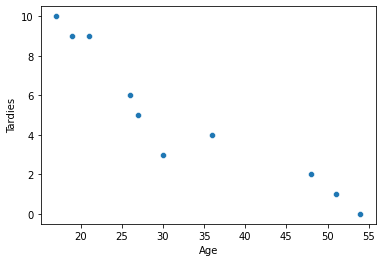

In [5]:
sns.scatterplot(x=student_data.Age, y=student_data.Tardies)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

- #### Yes, i see a trend that the less Age the more tardies that student will get during the bootcamp
- #### We can start trying to use this linear regression: $Tardies = - 0,22 * age + 12$

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

- #### Correlation:

In [6]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


- #### Covariance:

In [8]:
student_data["Age_error"] = student_data.Age - student_data.Age.mean()

In [10]:
student_data["Tardies_error"] = student_data.Tardies - student_data.Tardies.mean()

In [12]:
student_data["Errors"] = student_data.Age_error * student_data.Tardies_error

In [15]:
student_data.Errors.sum() / student_data.Errors.count()

-41.010000000000005

- #### The difference is that Correlation help you to understand how tight is the relation between both variables and covariance doesn't.
- #### Both measures tells me that the have an very tight inverse correlation like i asumed in first place. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [30]:
student_data["Tardies_prediction"] = - 0.22 * student_data.Age + 12 

# y = Tardies
# X = years 

In [31]:
student_data

,Age,Tardies,Age_error,Tardies_error,Errors,Tardies_prediction
0,17,10,-15.9,5.1,-81.09,8.26
1,51,1,18.1,-3.9,-70.59,0.78
2,27,5,-5.9,0.1,-0.59,6.06
3,21,9,-11.9,4.1,-48.79,7.38
4,36,4,3.1,-0.9,-2.79,4.08
5,48,2,15.1,-2.9,-43.79,1.44
6,19,9,-13.9,4.1,-56.99,7.82
7,26,6,-6.9,1.1,-7.59,6.28
8,54,0,21.1,-4.9,-103.39,0.12
9,30,3,-2.9,-1.9,5.51,5.40


Plot your regression model on your scatter plot.

No handles with labels found to put in legend.


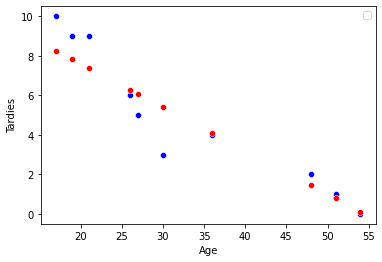

In [32]:
fig, ax = plt.subplots()
sns.scatterplot(x=student_data.Age, y=student_data.Tardies, color="b")
sns.scatterplot(x=student_data.Age, y=student_data.Tardies_prediction, color="r")

plt.legend()

- #### Let's generate a new model but not manually: 

In [33]:
lr = LinearRegression()

In [42]:
lr.fit(
    X = student_data[["Age"]],
    y = student_data.Tardies
)

LinearRegression()

In [43]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_

In [44]:
print(f"Beta 1: {beta_1}")
print(f"Beta 0: {beta_0}")

Beta 1: -0.2428207709159809
Beta 0: 12.888803363135771


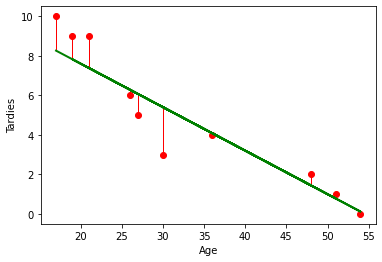

In [52]:
plt.scatter(student_data.Age, student_data.Tardies, color="r") # pintar los puntos
plt.plot(student_data.Age, student_data.Tardies_prediction, lw = 2, color="g") # pintamos la linea de regresión
plt.vlines(student_data.Age, student_data.Tardies_prediction, student_data.Tardies, lw=1, color="r") # pintamos las lineas que van desde los puntos a la linea de regresión (residuo)
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

# New model with linear regression:

In [53]:
results = smf.ols("Tardies ~ Age", data=student_data).fit()
results.summary()

# Let's find our metrics to understand if we can use this model to predict future tardies:

/home/ccastrob/anaconda3/envs/ironhack/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           5.57e-05
Time:                        16:48:09   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

- #### I got a R-square of 0.882 and a P of 0, so we can apply a model that can predict aproximately tardies with age.
- #### I got a good first prediction manually.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables.

In [67]:
data_vehicles = pd.read_csv("./vehicles.csv")

In [68]:
data_vehicles.columns

Index(['Make', 'Model', 'Year', 'Engine Displacement', 'Cylinders',
       'Transmission', 'Drivetrain', 'Vehicle Class', 'Fuel Type',
       'Fuel Barrels/Year', 'City MPG', 'Highway MPG', 'Combined MPG',
       'CO2 Emission Grams/Mile', 'Fuel Cost/Year'],
      dtype='object')

In [69]:
data_vehicles.columns = ['Maker','Model','Year','Displacement',
                'Cylinders','Transmission','Drivetrain',
                'Vehicle_class','Fuel_type','Fuel_barrels',
                'City_mpg','Highway_mpg','Combined_mpg',
                'CO2_emission','Fuel_cost']

In [70]:
data_vehicles.sample(5)

,Maker,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_class,Fuel_type,Fuel_barrels,City_mpg,Highway_mpg,Combined_mpg,CO2_emission,Fuel_cost
20127,Jeep,J-20 Pickup Truck,1986,5.9,8.0,Automatic 3-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks,Regular,29.964545,10,12,11,807.909091,3050
28244,Pontiac,6000,1989,2.5,4.0,Automatic 3-spd,Front-Wheel Drive,Midsize Cars,Regular,14.330870,21,28,23,386.391304,1450
15917,GMC,Sierra 1500 4WD,2001,4.8,8.0,Automatic 4-spd,4-Wheel or All-Wheel Drive,Standard Pickup Trucks 4WD,Regular,23.543571,13,16,14,634.785714,2400
18697,Infiniti,Q70 Hybrid,2015,3.5,6.0,Automatic (S7),Rear-Wheel Drive,Midsize Cars,Premium,10.632581,29,34,31,285.000000,1300
29163,Porsche,911 Carrera Cabriolet,2010,3.6,6.0,Manual 6-spd,Rear-Wheel Drive,Minicompact Cars,Premium,15.695714,18,25,21,423.190476,1950


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

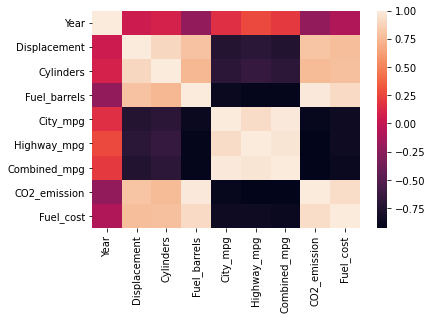

In [92]:
sns.heatmap(data_vehicles.corr())

# First, let's check a heatmap of the correlation between variables:
# It's easier to see fast where i have to focus my effort: 

In [93]:
data_vehicles.corr()

# Then, let's be more precise with numbers:

,Year,Displacement,Cylinders,Fuel_barrels,City_mpg,Highway_mpg,Combined_mpg,CO2_emission,Fuel_cost
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel_barrels,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City_mpg,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway_mpg,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined_mpg,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2_emission,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel_cost,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


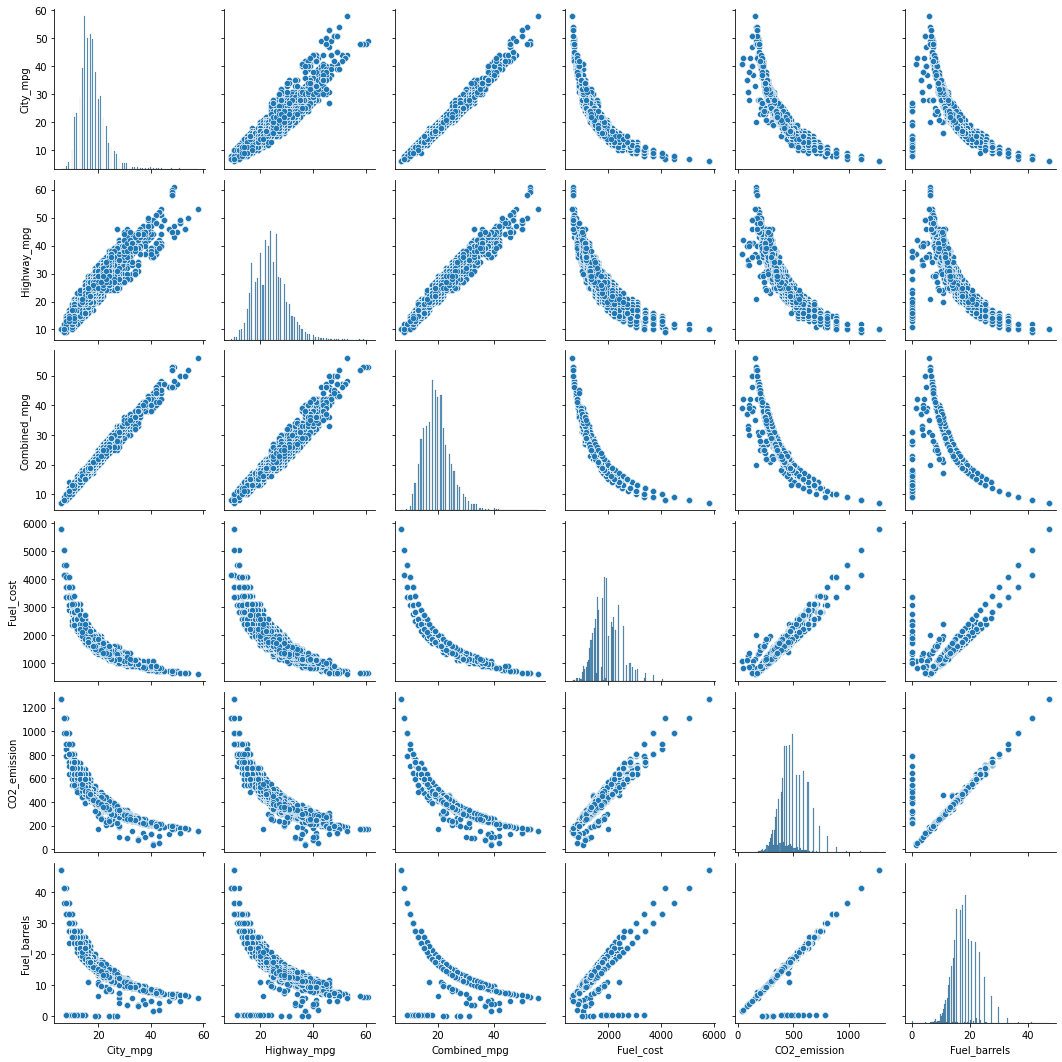

In [97]:
sns.pairplot(data_vehicles[["City_mpg", "Highway_mpg", "Combined_mpg", "Fuel_cost", "CO2_emission", "Fuel_barrels"]])

- #### Definetly, my best variable to predict CO2 emission is Fuel barrels/year
- #### The only issue that i found thanks to the pairplot is that we have some cars with a very low Fuel barrels consumption pero year. Probably because they are electric cars or something like that:

<AxesSubplot:xlabel='Fuel_barrels', ylabel='Count'>

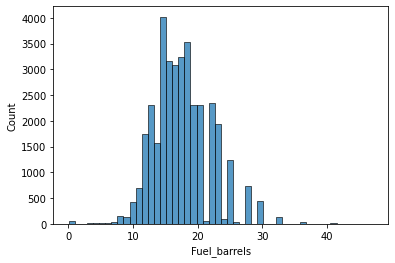

In [118]:
sns.histplot(data_vehicles["Fuel_barrels"], bins=50)

In [125]:
data_vehicles[data_vehicles["Fuel_barrels"] < 2]

,Maker,Model,Year,Displacement,Cylinders,Transmission,Drivetrain,Vehicle_class,Fuel_type,Fuel_barrels,City_mpg,Highway_mpg,Combined_mpg,CO2_emission,Fuel_cost
3069,BMW,i3 REX,2014,0.6,2.0,Auto(A1),Rear-Wheel Drive,Subcompact Cars,Premium Gas or Electricity,1.563190,41,37,39,40.000000,1050
3070,BMW,i3 REX,2015,0.6,2.0,Automatic (A1),Rear-Wheel Drive,Subcompact Cars,Premium Gas or Electricity,1.563190,41,37,39,40.000000,1050
3071,BMW,i3 REX,2016,0.6,2.0,Automatic (A1),Rear-Wheel Drive,Subcompact Cars,Premium Gas or Electricity,1.563190,41,37,39,37.000000,1050
5843,Chevrolet,Express Cargo (dedicated CNG),2004,6.0,8.0,Automatic 4-spd,Rear-Wheel Drive,"Vans, Cargo Type",CNG,0.155000,11,15,12,590.793750,2500
5845,Chevrolet,Express Passenger (dedicated CNG),2004,6.0,8.0,Automatic 4-spd,Rear-Wheel Drive,"Vans, Passenger Type",CNG,0.155000,11,15,12,590.793750,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32600,Toyota,Camry CNG,1999,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Compact Cars,CNG,0.080870,20,28,23,308.240217,1300
32601,Toyota,Camry CNG,2000,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Compact Cars,CNG,0.084545,19,28,22,322.251136,1400
32602,Toyota,Camry CNG,2001,2.2,4.0,Automatic 4-spd,Front-Wheel Drive,Compact Cars,CNG,0.084545,19,28,22,322.251136,1400
34120,VPG,MV-1 CNG,2011,4.6,8.0,Automatic 4-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,CNG,0.143077,11,16,13,545.348077,2350


In [129]:
data_vehicles[data_vehicles["Fuel_barrels"] < 2].Fuel_type.unique()

array(['Premium Gas or Electricity', 'CNG'], dtype=object)

In [127]:
data_vehicles.Fuel_type.unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'],
      dtype=object)

In [89]:
results = smf.ols("CO2_emission ~ Fuel_barrels", data=data_vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.275e+06
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        17:24:32   Log-Likelihood:            -1.5821e+05
No. Observations:               35952   AIC:                         3.164e+05
Df Residuals:                   35950   BIC:                         3.164e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_barrels    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### We got a R squared of 0.973 (Very high)

In [135]:
results = smf.ols("CO2_emission ~ Year", data=data_vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1869.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:06:41   Log-Likelihood:            -2.2194e+05
No. Observations:               35952   AIC:                         4.439e+05
Df Residuals:                   35950   BIC:                         4.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5725.8633    121.455     47.144      0.000    5487.807    5963.920
Year          -2.6243      0.061    -43.231      0.000      -2.743      -2.505
==============================================================================
Omnibus:                     3079.952   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4482.385
Skew:                           0.686   Prob(JB):                         0.00
Kurtosis:                       4.053   Cond. No.                     3.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- #### Based of the heatmap and the analysis the worst variable to predict CO2 emission is Year of the car

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [136]:
lr = LinearRegression()

In [140]:
lr.fit(
    X = data_vehicles[["Fuel_barrels"]],
    y = data_vehicles.CO2_emission
)

LinearRegression()

In [142]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(f"Beta 1: {beta_1}")
print(f"Beta 0: {beta_0}")

Beta 1: 26.283625397469898
Beta 0: 12.486520830763652


- #### i'm using linear regresion with one variable for now. It would be better to have in mind these cars: ['Premium Gas or Electricity', 'CNG']. They behave a little different from the rest and we should take in consideration to prepare a better model.

Print your regression summary, and interpret the results. What are the most important variables in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [143]:
# Let's do it again:

results = smf.ols("CO2_emission ~ Fuel_barrels", data=data_vehicles).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2_emission   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 1.275e+06
Date:                Tue, 06 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:13:41   Log-Likelihood:            -1.5821e+05
No. Observations:               35952   AIC:                         3.164e+05
Df Residuals:                   35950   BIC:                         3.164e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.4865      0.423     29.523      0.000      11.658      13.316
Fuel_barrels    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- #### The most important variable is Fuel barrels per year. }
- #### I'm using linear regresion with one variable for now. It would be better to have in mind these type of cars: ['Premium Gas or Electricity', 'CNG']. They behave a little different from the rest and we should take in consideration to build a better model.
- #### We have a high R-squared (0.973), so i'm very confident of this model but i think we can improve it a little bit based on the fuel type car.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [146]:
parties_data = pd.DataFrame({
    "people_invited": [1, 3, 4, 6, 8, 9, 11, 14],
    "people_attended": [1, 2, 4, 4, 5, 7, 8, 13]
})

In [147]:
parties_data

,people_invited,people_attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='people_invited', ylabel='people_attended'>

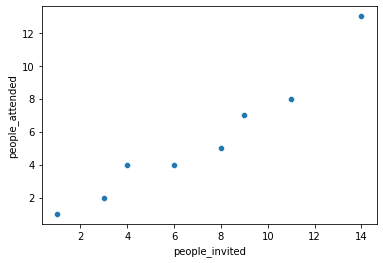

In [150]:
sns.scatterplot(x = parties_data.people_invited, y = parties_data.people_attended)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

- #### Seeing this plot i consider that it's a pretty linear relation between both variables.

#### First model:

In [159]:
lr.fit(
    X = parties_data[["people_invited"]],
    y = parties_data.people_attended
)

LinearRegression()

In [160]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(f"Beta 1: {beta_1}")
print(f"Beta 0: {beta_0}")

Beta 1: 0.8484848484848485
Beta 0: -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

- #### The last point it's seems like a outlier, if we remove it we can build a better model to predict the rest points:

#### Second model:

In [161]:
parties_data_2 = parties_data.loc[0:6]

In [162]:
lr.fit(
    X = parties_data_2[["people_invited"]],
    y = parties_data_2.people_attended
)

LinearRegression()

In [163]:
beta_1_2 = lr.coef_[0]
beta_0_2 = lr.intercept_
print(f"Beta 1: {beta_1}")
print(f"Beta 0: {beta_0}")

Beta 1: 0.8484848484848485
Beta 0: -0.43939393939393945


In [171]:
parties_data["prediction_1"] = parties_data.people_invited * beta_1 + beta_0

In [172]:
parties_data["prediction_2"] = parties_data.people_invited * beta_1_2 + beta_0_2

In [173]:
parties_data

,people_invited,people_attended,prediction_1,prediction_2
0,1,1,0.409091,1.007519
1,3,2,2.106061,2.375940
2,4,4,2.954545,3.060150
3,6,4,4.651515,4.428571
4,8,5,6.348485,5.796992
5,9,7,7.196970,6.481203
6,11,8,8.893939,7.849624
7,14,13,11.439394,9.902256


- #### Let's get everything in one DataFrame to plot it:

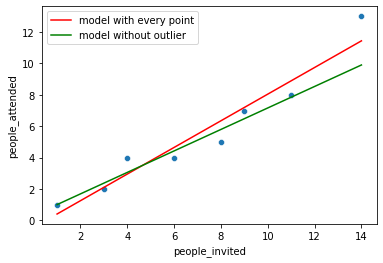

In [176]:
fig, ax = plt.subplots()
sns.scatterplot(x=parties_data.people_invited, y=parties_data.people_attended)

plt.plot(parties_data.people_invited, parties_data.prediction_1, color='r', label='model with every point')
plt.plot(parties_data.people_invited, parties_data.prediction_2, color='g', label='model without outlier')

plt.legend()

- #### It seems much more precise the new model using it in the second DataFrame (without the outlier).
- #### The new model plot it's closer to each point (except the outlier), so it predict their behaviour much better.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

- #### It's very important to check out if you have any outliers in your dataframes because they can change your whole model.  If you can remove them you will have a much more precise model instantly without using more variables.